<a href="https://colab.research.google.com/github/goeckslab/MarkerIntensityPredictor/blob/dev/KNN_Phenotype_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook the check the cell neighbor phenotypes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
phenotypes = pd.read_csv("mapped_phenotypes.csv")

# shift column Base cell to first position in df 
first_column = phenotypes.pop('Base Cell')
phenotypes.insert(0, 'Base Cell', first_column)
phenotypes


,Base Cell,1,2,3,4,5,6
0,Basal,Basal,Basal,Basal,Basal,Basal,Basal
1,Basal,Basal,Basal,Basal,Basal,Basal,Basal
2,Basal,Basal,Basal,Basal,Basal,Basal,Basal
3,Basal,Basal,Basal,Basal,Basal,Basal,Basal
4,Basal,Basal,Basal,Basal,Basal,Basal,Basal
...,...,...,...,...,...,...,...
27522,Basal,Immune,Basal,Basal,Basal,Immune,Basal
27523,Basal,Basal,Basal,Basal,Basal,Basal,Basal
27524,Basal,Basal,Basal,Basal,Basal,Basal,Basal
27525,Basal,Basal,Basal,Basal,Basal,Basal,Basal


In [4]:
# Load nearest neighbor indices

In [5]:
no_spatial_ni = pd.read_csv('no_spatial_nearest_neighbor_indices.csv')
no_spatial_ni = no_spatial_ni.T
no_spatial_ni.rename(columns={0:"Base Cell"}, inplace=True)
print(no_spatial_ni)


       Base Cell      1      2      3      4      5      6
0              0  17014  25626    259   5849   3507   5665
1              1   1914   3444   1765   5741     14     29
2              2  13249  13158   8991   7022  13146  14671
3              3     56   1925   6032   5993  16083   1468
4              4     10   6083     85   5912   5872   2601
...          ...    ...    ...    ...    ...    ...    ...
27522      27522  26951  27202  27504  27506  27028  26919
27523      27523  26732  26713  27508  27079  26762  26901
27524      27524  27021  27455  27523    888  27129  27075
27525      27525     35   3776  23067  10958   3894      1
27526      27526  26581  18185  15094  26895  24908  13293

[27527 rows x 7 columns]


In [6]:
spatial_ni = pd.read_csv('spatial_nearest_neighbor_indices.csv')
spatial_ni = spatial_ni.T
spatial_ni.rename(columns={0:"Base Cell"}, inplace=True)
print(spatial_ni)


       Base Cell      1      2      3      4      5      6
0              0     23     51      7      9     52     48
1              1     22   7969     50     42     36  12848
2              2   1284      9     52      3   1443     37
3              3      6     37   1925     46     60    955
4              4     10     85     56   1205     32     55
...          ...    ...    ...    ...    ...    ...    ...
27522      27522  27488  27504  27481  27361  27397  27430
27523      27523  27508  27524  26901  26775  27205  27477
27524      27524  27021  27523  27455  27129  27075  26762
27525      27525  17440  21836  23067  27524  26619  27039
27526      27526  26581  27229  26563  26895  26241  26702

[27527 rows x 7 columns]


In [7]:
data = pd.read_csv("HTA9-2_Bx1_HMS_Tumor_quant.csv")
data["Phenotype"] = phenotypes["Base Cell"]
data.shape

(27527, 77)

## Display phenotypes in biopsy

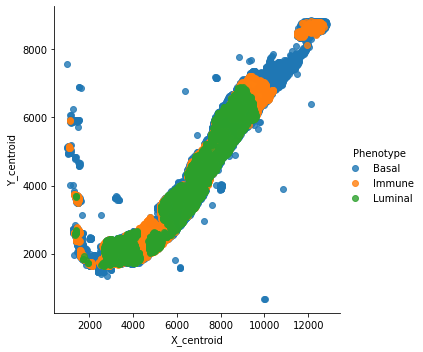

In [8]:
sns.lmplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype', fit_reg=False)

# Specify cell index to select all neighbors and investigate the neighbor hood

## Select no spatial neighbors

In [9]:
cell_index_to_evaluate = 2500

n_sp_neighbor_indices = no_spatial_ni[no_spatial_ni["Base Cell"] == cell_index_to_evaluate]
n_sp_phenotype_indices = phenotypes.loc[[cell_index_to_evaluate]]

print(n_sp_phenotype_indices)
print(n_sp_neighbor_indices)

     Base Cell      1      2      3      4      5      6
2500     Basal  Basal  Basal  Basal  Basal  Basal  Basal
      Base Cell      1      2      3      4      5     6
2500       2500  26522  26559  25127  26192  26634  1144


In [10]:
n_sp_cells = data.loc[n_sp_neighbor_indices.values[0].tolist()][["X_centroid", "Y_centroid"]]
n_sp_cells["Phenotype"] = phenotypes["Base Cell"]
n_sp_origin = pd.DataFrame(n_sp_cells.loc[[cell_index_to_evaluate]])
print(n_sp_origin)

n_sp_neighbors = n_sp_cells[1:]
print(n_sp_neighbors)

      X_centroid  Y_centroid Phenotype
2500  1422.28125  2060.03125     Basal
         X_centroid   Y_centroid Phenotype
26522  10899.517241  7618.218391     Basal
26559  11425.911765  7647.720588     Basal
25127  10487.983333  7009.533333     Basal
26192  10452.829787  7403.319149     Basal
26634  11228.581395  7808.953488     Basal
1144    1986.688525  1852.737705     Basal


Show nearest neighbor for given cell

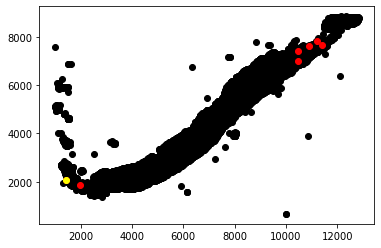

In [11]:
plt.scatter(data["X_centroid"] ,data["Y_centroid"], facecolors='black')
plt.scatter(n_sp_cells["X_centroid"], n_sp_cells["Y_centroid"] , color="red")
plt.scatter(n_sp_origin["X_centroid"], n_sp_origin["Y_centroid"] , color="yellow")


## Select spatial neighbors

In [12]:
sp_neighbor_indices = spatial_ni[spatial_ni["Base Cell"] == cell_index_to_evaluate]
sp_phenotype_indices = phenotypes.loc[[cell_index_to_evaluate]]

print(sp_phenotype_indices)
print(sp_neighbor_indices)

     Base Cell      1      2      3      4      5      6
2500     Basal  Basal  Basal  Basal  Basal  Basal  Basal
      Base Cell     1     2     3     4     5     6
2500       2500  4496  1144  4542  4480  3506  4368


In [13]:
sp_cells = data.loc[sp_neighbor_indices.values[0].tolist()][["X_centroid", "Y_centroid"]]
sp_cells["Phenotype"] = phenotypes["Base Cell"]
sp_cells
sp_origin = pd.DataFrame(sp_cells.loc[[cell_index_to_evaluate]])
print(sp_origin)

sp_neighbors = sp_cells[1:]
print(sp_neighbors)

      X_centroid  Y_centroid Phenotype
2500  1422.28125  2060.03125     Basal
       X_centroid   Y_centroid Phenotype
4496  1561.439394  2313.166667     Basal
1144  1986.688525  1852.737705     Basal
4542  1467.660194  2318.669903     Basal
4480  1485.707692  2308.892308     Basal
3506  1675.736842  2190.491228     Basal
4368  1548.565217  2297.811594     Basal


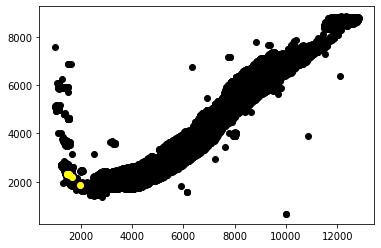

In [14]:
plt.scatter(data["X_centroid"] ,data["Y_centroid"], facecolors='black')
plt.scatter(sp_neighbors["X_centroid"], sp_neighbors["Y_centroid"] , color="red")
plt.scatter(sp_neighbors["X_centroid"], sp_neighbors["Y_centroid"] , color="yellow")

# Compare spatial and non spatial neighbors


Plot shows where the neighbors are located for the given cell, when including spatial information and without spatial information

Text(0.5, 1.0, 'Origin and Neighbors not including Spatial Information')

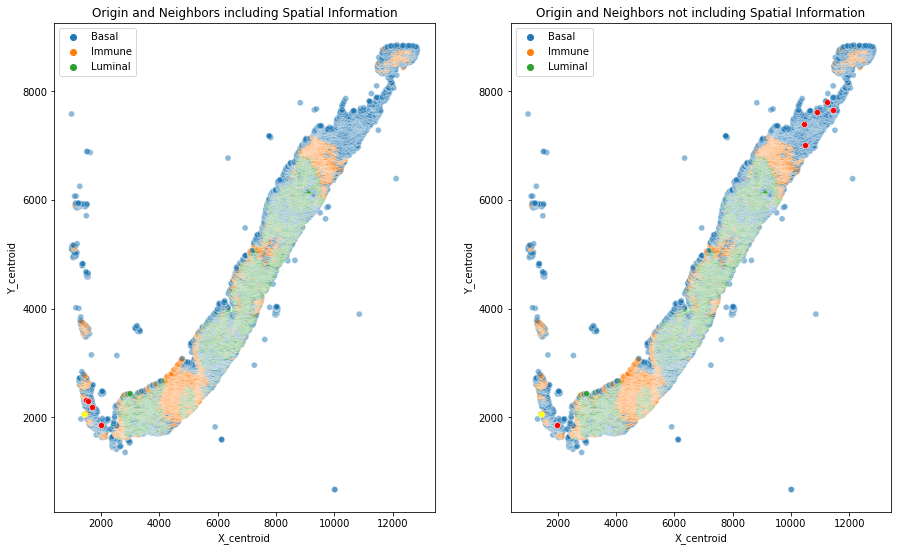

In [15]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,9))

sns.scatterplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype',  ax=ax1, alpha=0.5)
sns.scatterplot(x='X_centroid', y='Y_centroid', data=sp_neighbors, ax=ax1, color="red")
sns.scatterplot(x='X_centroid', y='Y_centroid', data=sp_origin, ax=ax1, color="yellow")
ax1.set_title("Origin and Neighbors including Spatial Information")


sns.scatterplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype',  ax=ax2, alpha=0.5)
sns.scatterplot(x='X_centroid', y='Y_centroid', data=n_sp_neighbors, ax=ax2, color="red")
sns.scatterplot(x='X_centroid', y='Y_centroid', data=n_sp_origin, ax=ax2, color="yellow")
ax2.set_title("Origin and Neighbors not including Spatial Information")

# Normalization & Replacements


In [53]:
normalized_test_data = pd.read_csv("normalized_test_data.csv")
replaced_test_data = pd.read_csv("replaced_test_data.csv")

means = normalized_test_data.mean()
std = normalized_test_data.std()


In [54]:
stacked_df = normalized_test_data.stack().reset_index()
stacked_df.rename(columns={"level_0": "Cell Id", "level_1": "Feature", 0: "Intensity"}, inplace=True)
stacked_df

,Cell Id,Feature,Intensity
0,0,ERK1_1,-3.713154
1,0,RAD51,-4.242005
2,0,Cyc_D1,-2.501901
3,0,Vimentin,-0.932333
4,0,aSMA,-1.069293
...,...,...,...
688170,27526,Area,2.630420
688171,27526,MajorAxisLength,1.790797
688172,27526,MinorAxisLength,2.777409
688173,27526,Solidity,1.280167


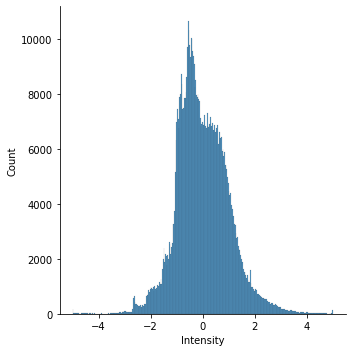

In [55]:
# Plot distribution
sns.displot(stacked_df, x="Intensity")

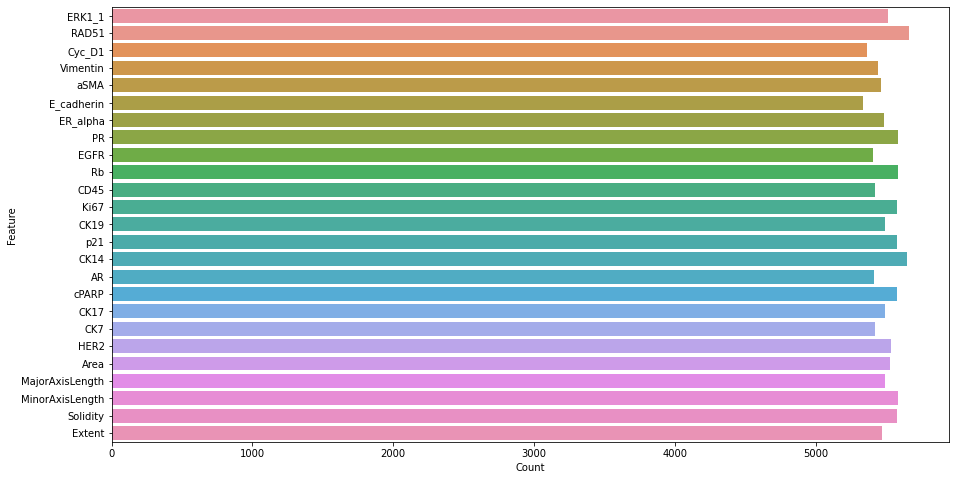

In [56]:
sums = pd.DataFrame((replaced_test_data == 0).astype(int).sum(axis=0)).reset_index()
sums.rename(columns={"index": "Feature", 0: "Count"}, inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(x="Count", y="Feature", data=sums)

#R2 Significance


Based on this thread
https://www.researchgate.net/post/Comparing_R-squared_values_in_two_models_any_help

and and answer by Ghassan Okour, 
R2 significance is calculated like the following:





```
Firstly; calculate the root square of both squared R.
Secondly; transform the values of the root square of both squared R into Fisher values.
Thirdly; use the formula Z=[z1-z2]/sqrt[(1/(n1-3))+(1/(n2-3))].
Fourthly; use the formula Sig. =(1-NORM.S.DIST(ABS(Z),TRUE))*2.
```



In [ ]:
# z function

def calculate_z(input1, input2):
  print(input1)
  print(input2)


In [ ]:
no_spatial_r2_scores_2 = pd.read_csv("no_spatial_imputed_r2_score_2.csv")
no_spatial_r2_scores_3 = pd.read_csv("no_spatial_imputed_r2_score_3.csv")

no_spatial_r2_scores_2.rename(columns={"Score": "2 Neighbor Score"}, inplace=True)
no_spatial_r2_scores_3.rename(columns={"Score": "3 Neighbor Score"}, inplace=True)

markers = no_spatial_r2_scores_2["Marker"]

combined = pd.concat([no_spatial_r2_scores_2, no_spatial_r2_scores_3], axis=1)
combined.drop(columns=["Marker"], inplace=True)
combined["Marker"] = markers

# Set negative values to 0
num = combined._get_numeric_data()
num[num < 0] = 0

combined['2 Neighbor Squareroot']=combined['2 Neighbor Score']**(1/2)
combined['3 Neighbor Squareroot']=combined['3 Neighbor Score']**(1/2)


combined["2 Neighbor Z"] = combined["2 Neighbor Squareroot"].apply(lambda x : 0.5* (np.log(1 + x) - np.log(1-x)))
combined["3 Neighbor Z"] = combined["3 Neighbor Squareroot"].apply(lambda x : 0.5* (np.log(1 + x) - np.log(1-x)))
combined["Z"] = (combined["2 Neighbor Z"] - combined["3 Neighbor Z"]) / np.sqrt(1 / (combined["2 Neighbor Z"].shape[0]-3) + (1/(combined["3 Neighbor Z"].shape[0]-3)))
combined["Significane"] = (1 - np.random.normal(np.absolute(combined["Z"]))) * 2
print(combined)